In [1]:
import splitfolders

splitfolders.ratio(
    input="deepfakeimages",     # source folder
    output="Ddataset",          # destination folder
    seed=1337,                  # optional: ensures reproducibility
    ratio=(.7, .1, .2),         # train, val, test split
    group_prefix=None,          # optional: group files by prefix
    move=True                   # set to False to copy instead of move
)

Copying files: 978 files [00:06, 156.49 files/s]


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE=256
CHANNELS=3


train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
    'Ddataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 684 images belonging to 2 classes.


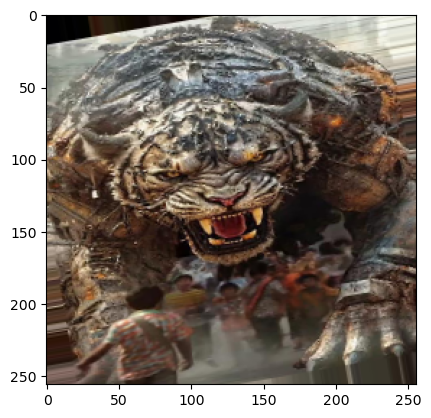

In [7]:
for image_batch,label_batch in train_generator:
    plt.imshow(image_batch[0])
    break

In [9]:
validation_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator=validation_datagen.flow_from_directory(
    'Ddataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 97 images belonging to 2 classes.


In [10]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator=test_datagen.flow_from_directory(
    'Ddataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 197 images belonging to 2 classes.


In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path, size=(256, 256)):
    img = load_img(path, target_size=size)
    img_array = img_to_array(img)
    return img_array / 255.0